///---
layout: post
title: "Taylor Series Using Sympy"
comments: true
share: true
date: 2018-05-28 08:49:00
description: Sympy를 이용하여 Taylor Series를 전개한다
tags: sympy python math
toc: true
sitemap :
  changefreq : daily
  priority : 1.0
///---

# Sympy를 이용한 Taylor Series 전개
---
직관적으로 이해하기 힘든 함수들을 분석하거나 오래 걸리는 연산을 빠르게 하기 위해서 Taylor Series를 종종 사용한다. 대상 함수가 $f(x)$인 경우 Taylor series는 다음과 같다.



$$T _ { f } ( x ) = \sum _ { n = 0} ^ { \infty } \frac { f ^ { ( n ) } ( x_0 ) } { n ! } ( x - x_0 ) ^ { n } = f ( x_0 ) + f ^ { \prime } ( x_0 ) ( x - x_0 ) + \frac { 1} { 2} f ^ { \prime \prime } ( x_0 ) ( x - x_0 ) ^ { 2} + \frac { 1} { 6} f ^ { \prime \prime \prime } ( x_0 ) ( x - x_0 ) ^ { 3}$$


대부분의 경우 $f(x)$의 미분을 구하기가 쉽지 않거나 매우 번거롭기 때문에 이런 업무는 컴퓨터에게 시키는 게 편하다. 다른 사람은 몰라도 최소한 나보다는 컴퓨터가 이런 일을 훨씬 잘한다.

## sympy를 이용한 1변수 함수(univariate function)의 Taylor Series

In [1]:
from ok_sympy import remove_high_order_of_sympy_equation, print_source

In [2]:
# Show in Markdown
from IPython.display import display
from sympy import Symbol, init_printing, atan, sqrt
init_printing()

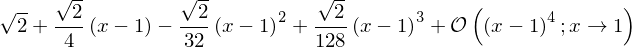

In [3]:
# Show in Markdown
x = Symbol('x')
f = sqrt(1+x)
f_taylor = f.series(x, x0=1, n=4)
display(f_taylor)

series의 x0 변수를 이용하여 Taylor series의 미분 지점을 설정할 수 있고 n을 조절하면 Taylor series의 차수를 정할 수 있다.
series를 이용하면 설정한 n 이상의 차수는 O로 표현되는데 O를 포함한 방정식을 다른 연산에 사용하면 오류가 발생한다. 이 O는 removeO 함수를 이용하여 제거할 수 있다.

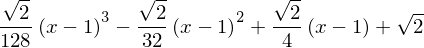

In [4]:
# Show in Markdown
f_taylor_valid = f_taylor.removeO()
display(f_taylor_valid)

## sympy를 이용한 다변수 함수(multivariate function)의 Taylor Series

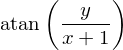

In [5]:
# Show in Markdown
x = Symbol('x')
y = Symbol('y')
f = atan(y/(1+x))
display(f)

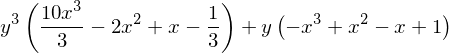

In [6]:
# Show in Markdown
num_order = 4
f_taylor = f.series(x, 0, num_order).removeO().series(y, 0, num_order).removeO()
display(f_taylor)

series 함수의 n 값은 변수에 대한 차수이기 때문에 다변수 함수의 전체 차수는 설정한 n보다 커지게 된다.
다변수 함수의 전체 차수를 제한하기 위해서 짧은 코딩이 필요하다.


In [7]:
print_source(remove_high_order_of_sympy_equation)

```python
# Show in Markdown
def remove_high_order_of_sympy_equation(eq, order_required, *variable_names):
    from itertools import permutations
    from sympy import O

    eq_simple = eq.expand()

    num_variable = len(variable_names)
    list_permutation_all = list(permutations(range(order_required+1), num_variable))
    list_permutation = [
        order for order in list_permutation_all if sum(order) >= order_required
    ]

    for orders in list_permutation:
        term = None
        for idx, order in enumerate(orders):
            if term is None:
                term = variable_names[idx] ** order
            else:
                term *= variable_names[idx] ** order

        if term:
            eq_simple += O(term)

    return eq_simple.expand().removeO()

```


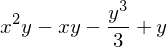

In [8]:
# Show in Markdown
f_taylor_limited = remove_high_order_of_sympy_equation(f_taylor, num_order, x, y)
display(f_taylor_limited)